# Client-Server Architecture

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

## Client 3

In [2]:
df_3_false = pd.read_csv('../data/csv_files/hdumb_3_false1.csv')
df_3_false.head()

,timestamp,src_ip,dst_ip,src_port,dst_port,udp_payload_length,ip_payload_length
0,1.657931e+09,10.0.3.1,10.0.12.1,40597,10000,104,132
1,1.657931e+09,10.0.12.1,10.0.3.1,10000,40597,104,132
2,1.657931e+09,10.0.3.1,10.0.12.1,40597,10000,157,185
3,1.657931e+09,10.0.1.1,10.0.12.1,33879,10000,104,132
4,1.657931e+09,10.0.12.1,10.0.1.1,10000,33879,104,132


In [3]:
def network_dag(df, title='Graph'):
    # Create a directed graph
    G = nx.DiGraph()
    
    # Add edges with cumulative weights
    for (src, dst), group in df.groupby(['src_ip', 'dst_ip']):
        total_weight = group['udp_payload_length'].sum()
        G.add_edge(src, dst, weight=total_weight)
    
    for node in G.nodes():
        G.nodes[node]['type'] = 'server' if '12.1' in node else 'client'
    
    # Use a color map
    color_map = {'client': 'skyblue', 'server': 'salmon'}
    node_colors = [color_map[G.nodes[node]['type']] for node in G]
    
    # Draw the graph
    plt.figure(figsize=(8, 6))
    pos = nx.kamada_kawai_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=3000, node_color=node_colors)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.5, font_size=10)
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    return None

In [4]:
def my_draw_networkx_edge_labels(
    G,
    pos,
    edge_labels=None,
    label_pos=0.5,
    font_size=10,
    font_color="k",
    font_family="sans-serif",
    font_weight="normal",
    alpha=None,
    bbox=None,
    horizontalalignment="center",
    verticalalignment="center",
    ax=None,
    rotate=True,
    clip_on=True,
    rad=0
):
    """Draw edge labels.

    Parameters
    ----------
    G : graph
        A networkx graph

    pos : dictionary
        A dictionary with nodes as keys and positions as values.
        Positions should be sequences of length 2.

    edge_labels : dictionary (default={})
        Edge labels in a dictionary of labels keyed by edge two-tuple.
        Only labels for the keys in the dictionary are drawn.

    label_pos : float (default=0.5)
        Position of edge label along edge (0=head, 0.5=center, 1=tail)

    font_size : int (default=10)
        Font size for text labels

    font_color : string (default='k' black)
        Font color string

    font_weight : string (default='normal')
        Font weight

    font_family : string (default='sans-serif')
        Font family

    alpha : float or None (default=None)
        The text transparency

    bbox : Matplotlib bbox, optional
        Specify text box properties (e.g. shape, color etc.) for edge labels.
        Default is {boxstyle='round', ec=(1.0, 1.0, 1.0), fc=(1.0, 1.0, 1.0)}.

    horizontalalignment : string (default='center')
        Horizontal alignment {'center', 'right', 'left'}

    verticalalignment : string (default='center')
        Vertical alignment {'center', 'top', 'bottom', 'baseline', 'center_baseline'}

    ax : Matplotlib Axes object, optional
        Draw the graph in the specified Matplotlib axes.

    rotate : bool (deafult=True)
        Rotate edge labels to lie parallel to edges

    clip_on : bool (default=True)
        Turn on clipping of edge labels at axis boundaries

    Returns
    -------
    dict
        `dict` of labels keyed by edge

    Examples
    --------
    >>> G = nx.dodecahedral_graph()
    >>> edge_labels = nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G))

    Also see the NetworkX drawing examples at
    https://networkx.org/documentation/latest/auto_examples/index.html

    See Also
    --------
    draw
    draw_networkx
    draw_networkx_nodes
    draw_networkx_edges
    draw_networkx_labels
    """
    import matplotlib.pyplot as plt
    import numpy as np

    if ax is None:
        ax = plt.gca()
    if edge_labels is None:
        labels = {(u, v): d for u, v, d in G.edges(data=True)}
    else:
        labels = edge_labels
    text_items = {}
    for (n1, n2), label in labels.items():
        (x1, y1) = pos[n1]
        (x2, y2) = pos[n2]
        (x, y) = (
            x1 * label_pos + x2 * (1.0 - label_pos),
            y1 * label_pos + y2 * (1.0 - label_pos),
        )
        pos_1 = ax.transData.transform(np.array(pos[n1]))
        pos_2 = ax.transData.transform(np.array(pos[n2]))
        linear_mid = 0.5*pos_1 + 0.5*pos_2
        d_pos = pos_2 - pos_1
        rotation_matrix = np.array([(0,1), (-1,0)])
        ctrl_1 = linear_mid + rad*rotation_matrix@d_pos
        ctrl_mid_1 = 0.5*pos_1 + 0.5*ctrl_1
        ctrl_mid_2 = 0.5*pos_2 + 0.5*ctrl_1
        bezier_mid = 0.5*ctrl_mid_1 + 0.5*ctrl_mid_2
        (x, y) = ax.transData.inverted().transform(bezier_mid)

        if rotate:
            # in degrees
            angle = np.arctan2(y2 - y1, x2 - x1) / (2.0 * np.pi) * 360
            # make label orientation "right-side-up"
            if angle > 90:
                angle -= 180
            if angle < -90:
                angle += 180
            # transform data coordinate angle to screen coordinate angle
            xy = np.array((x, y))
            trans_angle = ax.transData.transform_angles(
                np.array((angle,)), xy.reshape((1, 2))
            )[0]
        else:
            trans_angle = 0.0
        # use default box of white with white border
        if bbox is None:
            bbox = dict(boxstyle="round", ec=(1.0, 1.0, 1.0), fc=(1.0, 1.0, 1.0))
        if not isinstance(label, str):
            label = str(label)  # this makes "1" and 1 labeled the same

        t = ax.text(
            x,
            y,
            label,
            size=font_size,
            color=font_color,
            family=font_family,
            weight=font_weight,
            alpha=alpha,
            horizontalalignment=horizontalalignment,
            verticalalignment=verticalalignment,
            rotation=trans_angle,
            transform=ax.transData,
            bbox=bbox,
            zorder=1,
            clip_on=clip_on,
        )
        text_items[(n1, n2)] = t

    ax.tick_params(
        axis="both",
        which="both",
        bottom=False,
        left=False,
        labelbottom=False,
        labelleft=False,
    )

    return text_items

In [22]:
def network_dag_multiple(df, title='Graph', save_file_name=None):
    G = nx.DiGraph()
    for (src, dst), group in df.groupby(['src_ip', 'dst_ip']):
            total_weight = group['udp_payload_length'].sum()
            G.add_edge(src, dst, weight=total_weight)
    
    plt.figure(figsize=(8, 6))
    # pos = nx.kamada_kawai_layout(G)
    server_node = '10.0.12.1'  # example server IP

    # Calculate positions: server at center, others in a circle around it
    pos = {}
    center = np.array([0, 0])  # center position for the server
    pos[server_node] = center

    # Other nodes
    other_nodes = [node for node in G.nodes() if node != server_node]
    angle_gap = 2 * np.pi / len(other_nodes)
    radius = 2  # radius of the circle on which other nodes will be placed
    
    for i, node in enumerate(other_nodes):
        angle = i * angle_gap
        pos[node] = center + radius * np.array([np.cos(angle), np.sin(angle)])
    nx.draw_networkx_nodes(G, pos, node_color='orange')
    nx.draw_networkx_labels(G, pos, font_size=10)
    curved_edges = [edge for edge in G.edges() if reversed(edge) in G.edges()]
    arc_rad = 0.15
    nx.draw_networkx_edges(G, pos, edgelist=curved_edges, width=1.5, connectionstyle=f'arc3, rad = {arc_rad}')
    edge_weights = nx.get_edge_attributes(G, 'weight')
    curved_edge_labels = {edge: edge_weights[edge] for edge in curved_edges}
    my_draw_networkx_edge_labels(G, pos, edge_labels=curved_edge_labels, rotate=True, rad = arc_rad)
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    
    if save_file_name:
        plt.savefig(save_file_name)
        
    plt.show()

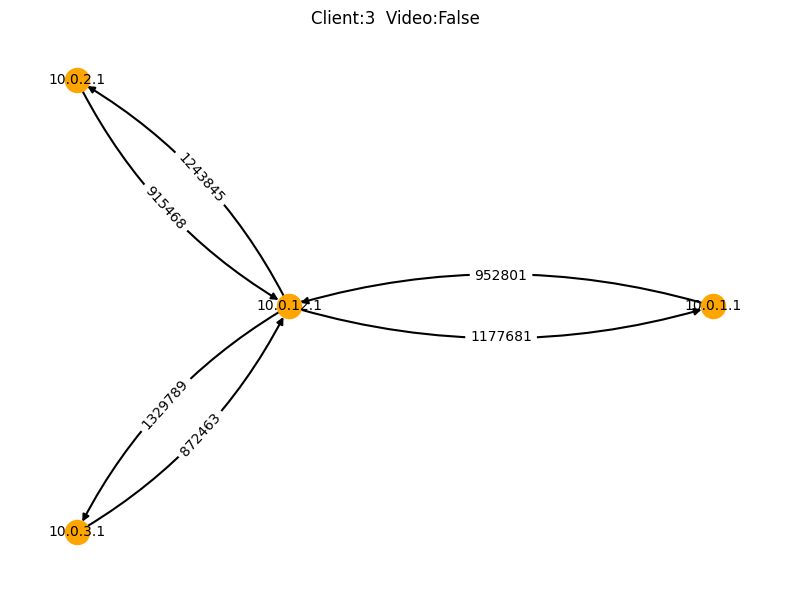

In [26]:
network_dag_multiple(df_3_false, title='Client:3  Video:False')
# network_dag_multiple(df_3_false, title='Client:3  Video:False', save_file_name='client3_false.png')

In [9]:
df_3_false.groupby(['src_ip', 'dst_ip']).sum()

timestamp   src_port   dst_port  udp_payload_length  \
src_ip    dst_ip                                                              
10.0.1.1  10.0.12.1  1.741988e+13  355966653  105070000              952801   
10.0.12.1 10.0.1.1   2.185982e+13  131850000  446694615             1177681   
          10.0.2.1   2.235720e+13  134850000  714044235             1243845   
          10.0.3.1   2.342325e+13  141280000  573554416             1329789   
10.0.2.1  10.0.12.1  1.742651e+13  556567961  105110000              915468   
10.0.3.1  10.0.12.1  1.743315e+13  426877455  105150000              872463   

                     ip_payload_length  
src_ip    dst_ip                        
10.0.1.1  10.0.12.1            1246997  
10.0.12.1 10.0.1.1             1546861  
          10.0.2.1             1621425  
          10.0.3.1             1725373  
10.0.2.1  10.0.12.1            1209776  
10.0.3.1  10.0.12.1            1166883

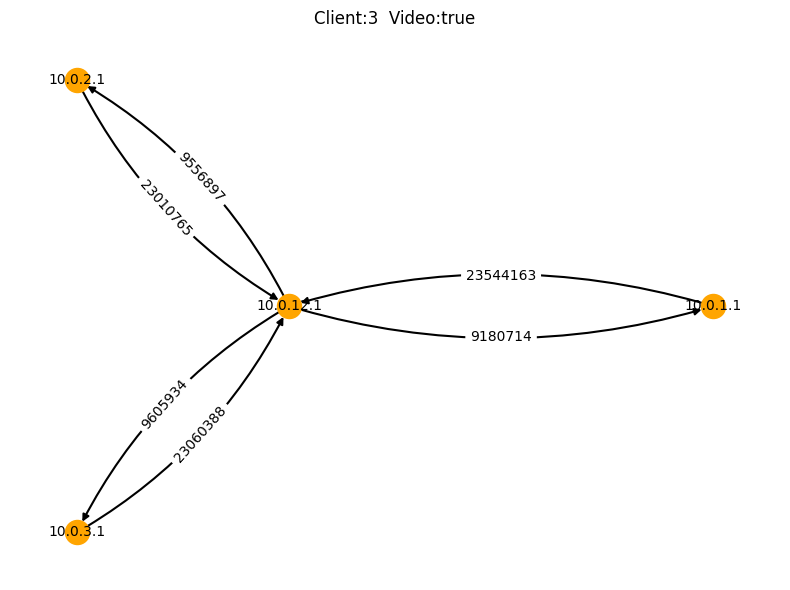

In [25]:
df_3_true = pd.read_csv('../data/samples/sample_hdumb_3_true.csv')
network_dag_multiple(df_3_true, title='Client:3  Video:true')
# network_dag_multiple(df_3_true, title='Client:3  Video:true', save_file_name='client3_true.png')

## Client 5

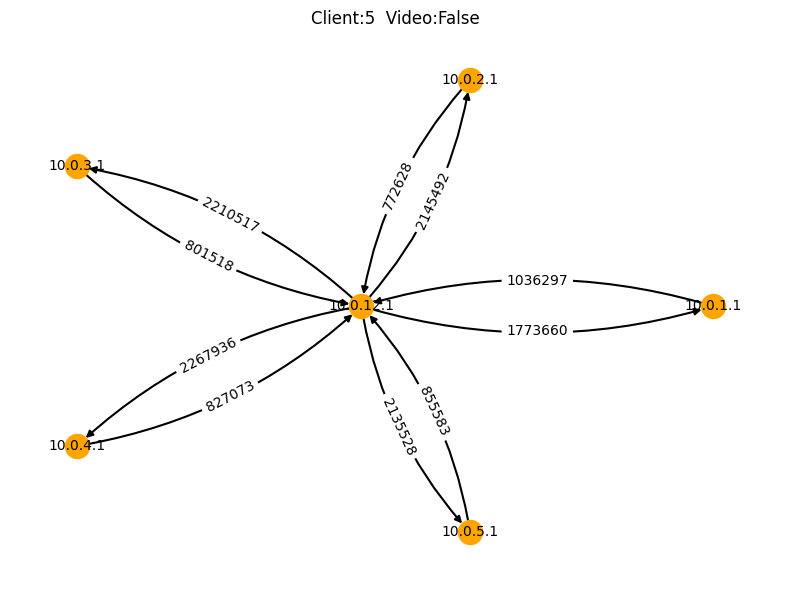

In [27]:
df_5_false = pd.read_csv('../data/csv_files/hdumb_5_false1.csv')
network_dag_multiple(df_5_false, title='Client:5  Video:False')
# network_dag_multiple(df_5_false, title='Client:5  Video:False', save_file_name='client5_false.png')

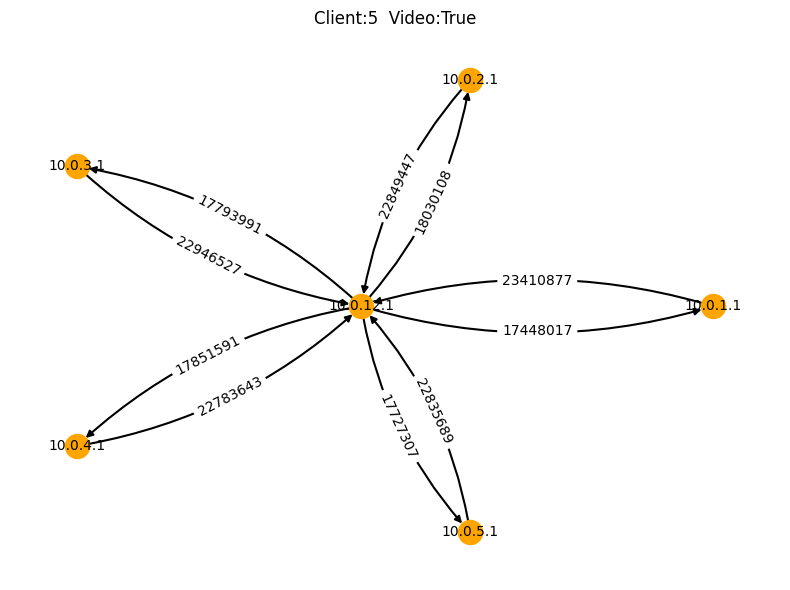

In [28]:
df_5_true = pd.read_csv('../data/samples/sample_hdumb_5_true.csv')
network_dag_multiple(df_5_true, title='Client:5  Video:True')
# network_dag_multiple(df_5_true, title='Client:5  Video:True', save_file_name='client5_true.png')

## Client 8

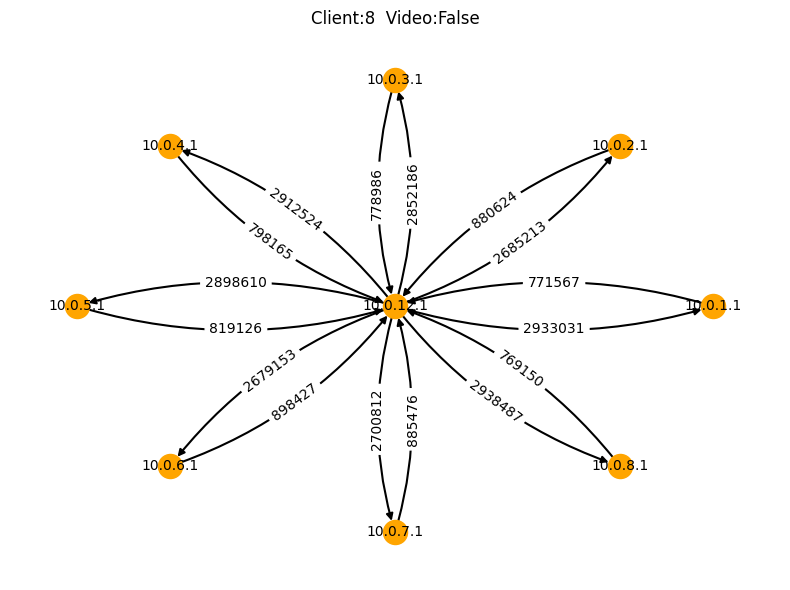

In [30]:
df_8_false = pd.read_csv('../data/csv_files/hdumb_8_false1.csv')
network_dag_multiple(df_8_false, title='Client:8  Video:False')
# network_dag_multiple(df_8_false, title='Client:8  Video:False', save_file_name='client8_false.png')

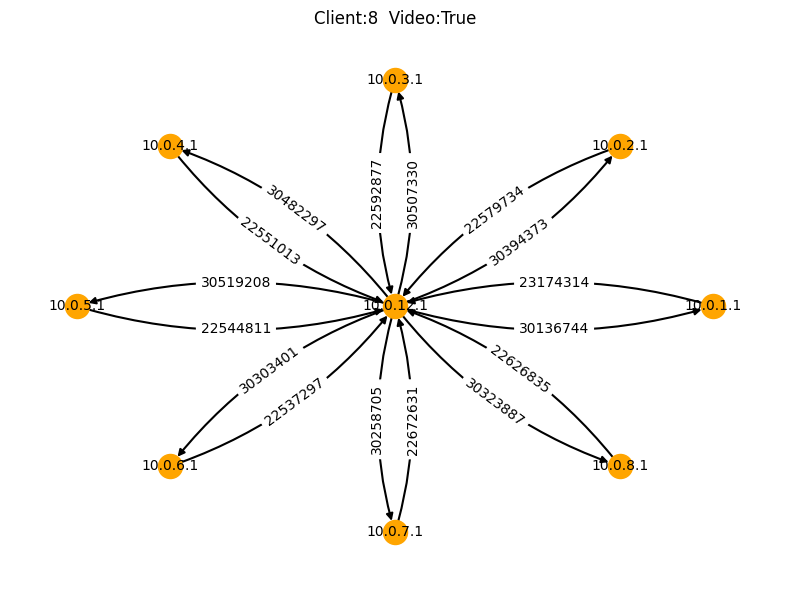

In [31]:
df_8_true = pd.read_csv('../data/samples/sample_hdumb_8_true.csv')
network_dag_multiple(df_8_true, title='Client:8  Video:True')
# network_dag_multiple(df_8_true, title='Client:8  Video:True', save_file_name='client8_true.png')

Network behaivor can infer the user's talking behavior 
- The variance in total bytes are bigger for video-off compared with video-on
- 10.0.1.1 is significantly large

## Tiered

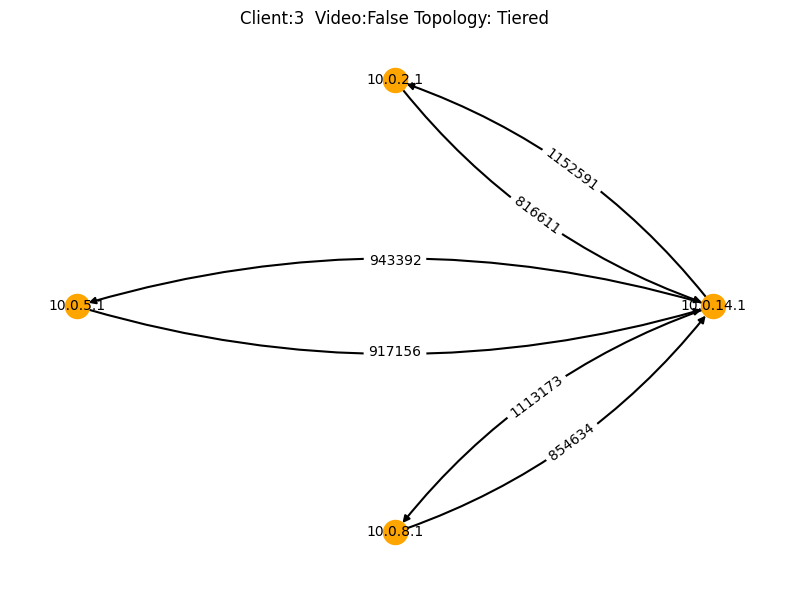

In [40]:
df_3_false2 = pd.read_csv('../data/csv_files/tiered_3_false1.csv')
network_dag_multiple(df_3_false2, title='Client:3  Video:False Topology: Tiered')

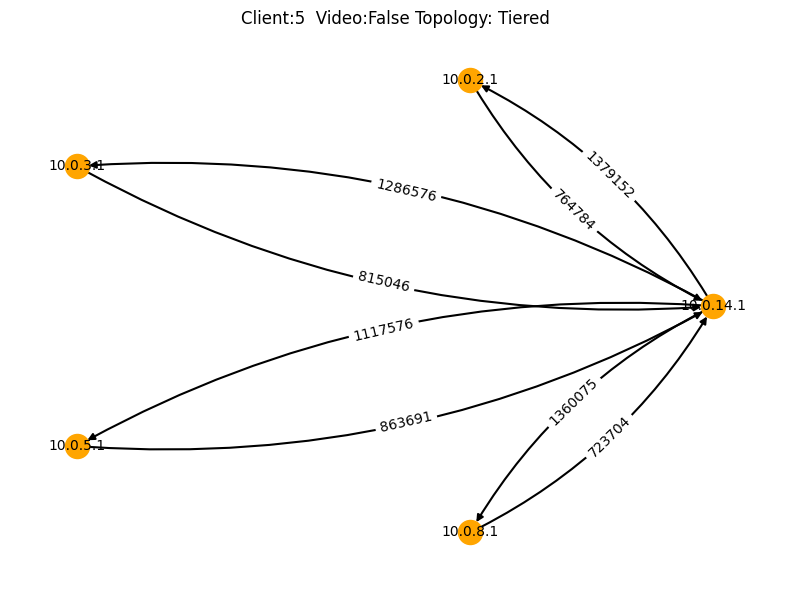

In [19]:
df_5_false2 = pd.read_csv('../data/csv_files/tiered_5_false1.csv')
network_dag_multiple(df_5_false2, title='Client:5  Video:False Topology: Tiered')

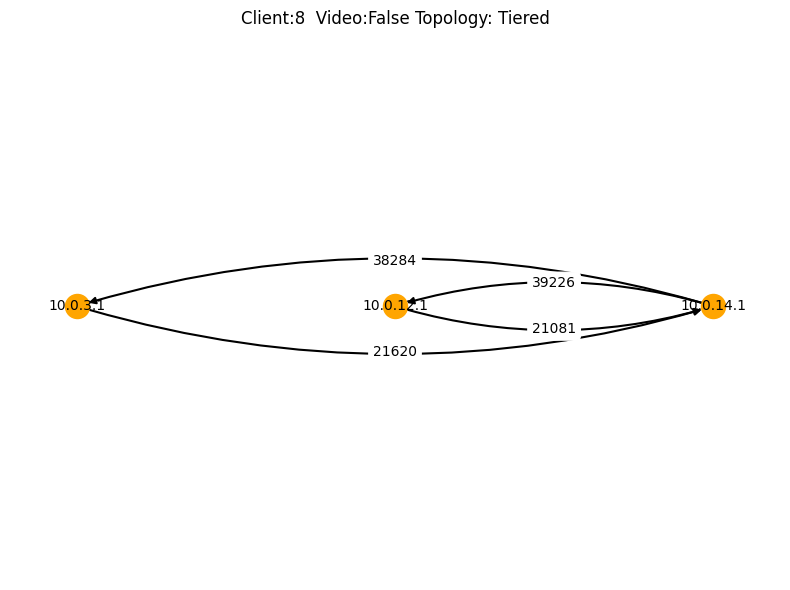

In [18]:
df_8_false2 = pd.read_csv('../data/csv_files/tiered_8_false1.csv')
network_dag_multiple(df_8_false2, title='Client:8  Video:False Topology: Tiered')